In [30]:
# Output plots inline with every jupyter statement
%matplotlib inline 

from matplotlib import pyplot as plt # Pyplot provides plotting functions
import numpy as np # numpy provide similar functionality to that provided by matlab
import datetime # for using time objects
from sqlalchemy import create_engine # sqlalchemy allows python to import an sqlite database

# Pandas provides a variety of tools 
# make it easier to process your data
# and produce meaningful reports
import pandas as pd

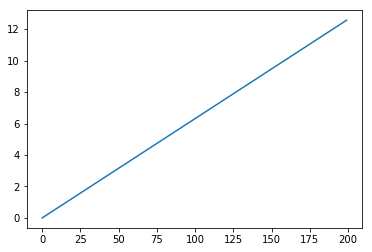

In [19]:
# First we'll reveiw some of the plotting functionality
# which will be very similar to matlab. 

# np.linspace(a,b,n) produces length n array of values
# between a and b
x=np.linspace(0,4*np.pi,200)

# Like in matlab, you can plot with just a single list
# pyplot will simply use the list indices as the x axis,
# while the values contained in the array form the y axis. 
plt.plot(x)

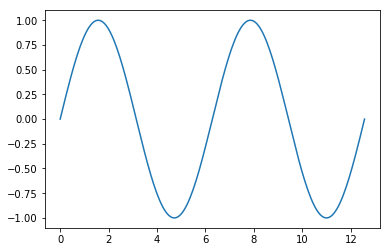

In [20]:
# If you want to plot a function of the list, you can just
# enter in a second argument. Also, notice that there is no
# need to iterate through your array when calling the np.sin() 
# function. Numpy automatically does most element-by-element
# operations for you, which makes array code easier to read. 
y1=np.sin(x)
plt.plot(x,y1)

In [21]:
# Another feature in numpy is the ability to generate random noise
# x.shape ensures that the noise vector has the same shape as the input vector
# np.random.random_sample() generates a random number in the range [0,1].
# multiplying by 1.5 extends the range to [0,1.5]
# Subtracting .75 centers the random noise around zero, so you range is [-.75,.75]
noise = 1.5*np.random.random_sample(x.shape)-.75
y=np.sin(x)+noise

print('x',x.shape)
print('y',y.shape)
print('noise',noise.shape)

x (200,)
y (200,)
noise (200,)


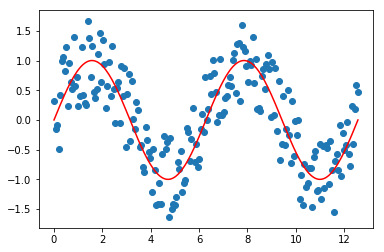

In [22]:
# plt.scatter() can show you your sampled points
plt.scatter(x,y)
# You can then plot a second line on the current figure without calling hold on
plt.plot(x,y1,'red')

In [23]:
# Now we'll try an example pulling from a database. 
# create_engine() which we imported earlier will connect
# python to our sqlite database. The syntax is:
# create_engine('sqlite:///relative_path_to_database')
eng=create_engine('sqlite:///test.db')

In [24]:
# Once you have created your sqlite engine, pandas can use 
# The engine to start processing your data. 
# The syntax to open a table is:
# pd.read_sql_table('table_name',sql_engine)
# In this example, test.db only contains one Table: 'Measurement'
test_dataframe=pd.read_sql_table('Measurement',eng)

# A dataframe is a custom type from the pandas library
# dataframes make manipulating sql data in python easier
# Print dataframe.head() to show the first few entries
print(test_dataframe.head())

   id                  timestamp  color  salinity_measurement
0   1 2017-03-05 16:35:31.197949    red                   259
1   2 2017-03-05 16:35:31.197949  green                   493
2   3 2017-03-05 16:35:31.197949   blue                   743
3   4 2017-03-05 16:35:31.697949    red                   278
4   5 2017-03-05 16:35:31.697949  green                   501


In [25]:
# you can access a column of a dataframe using square brackets
# and the column name: 
colors=test_dataframe['color']
# The output is another datatype from the pandas class, called
# a series. For our purposes, you can consider a series to be
# virtually identical to the native python lists. 
print(type(colors))
print(colors.head())

<class 'pandas.core.series.Series'>
0      red
1    green
2     blue
3      red
4    green
Name: color, dtype: object


In [26]:
# The pandas library has a wide variety of features and functions
# Which you can use to process your data. The first one we'll look
# at is grouping. Grouping is done with:
# dataframe.groupby('columname')
# For every unique value in this column, test_dataframe is split into a 
# different grouped dataframe
grouped_df=test_dataframe.groupby('color')
for name,group in grouped_df:
    print(name,'group')
    print(group.head(),'\n\n')

blue group
    id                  timestamp color  salinity_measurement
2    3 2017-03-05 16:35:31.197949  blue                   743
5    6 2017-03-05 16:35:31.697949  blue                   726
8    9 2017-03-05 16:35:32.197949  blue                   700
11  12 2017-03-05 16:35:32.697949  blue                   669
14  15 2017-03-05 16:35:33.197949  blue                   651 


green group
    id                  timestamp  color  salinity_measurement
1    2 2017-03-05 16:35:31.197949  green                   493
4    5 2017-03-05 16:35:31.697949  green                   501
7    8 2017-03-05 16:35:32.197949  green                   508
10  11 2017-03-05 16:35:32.697949  green                   490
13  14 2017-03-05 16:35:33.197949  green                   501 


red group
    id                  timestamp color  salinity_measurement
0    1 2017-03-05 16:35:31.197949   red                   259
3    4 2017-03-05 16:35:31.697949   red                   278
6    7 2017-03-05 16:35:3

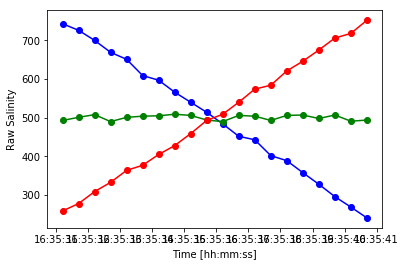

In [27]:
# grouped_df now contains three different dataframes. One with 
# every measurement in the blue tank, one in the green tank, and 
# one in the blue tank. Now we can easily do a scatter plot of
# all our measurements
for name,group in grouped_df:
    times=group['timestamp']
    raw_salinity=group['salinity_measurement']
    plt.plot_date(times,raw_salinity,name,marker='o')
    plt.xlabel('Time [hh:mm:ss]')
    plt.ylabel('Raw Salinity')

In [28]:
# Now let's create a function which will map the raw salinity measurements
# from the Arduino analog output values to actual salinity values
def map_salinity(raw_values):
    salinity=-3045*np.log(raw_values)+9107.2
    return salinity

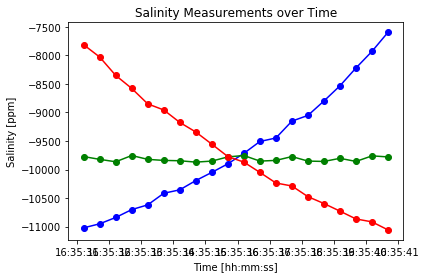

In [29]:
#Now redrawing the graph with the map_salinty() function
for name,group in grouped_df:
    times=group['timestamp']
    salinity=map_salinity(group['salinity_measurement'])
    plt.plot_date(times,salinity,name,marker='o')
    plt.title('Salinity Measurements over Time')
    plt.xlabel('Time [hh:mm:ss]')
    plt.ylabel('Salinity [ppm]')